Link to report: https://docs.google.com/document/d/1f8A-HiYtjLdzXgcUQs9cU-PoODUmsqIaimeOcNEN3UI/edit?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Company(FRA) (1) (1).csv")

# 1. INITIAL ANALYSIS

In [ ]:
df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [ ]:
df.drop("Num", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Networth Next Year                           4256 non-null   float64
 1   Total assets                                 4256 non-null   float64
 2   Net worth                                    4256 non-null   float64
 3   Total income                                 4025 non-null   float64
 4   Change in stock                              3706 non-null   float64
 5   Total expenses                               4091 non-null   float64
 6   Profit after tax                             4102 non-null   float64
 7   PBDITA                                       4102 non-null   float64
 8   PBT                                          4102 non-null   float64
 9   Cash profit                                  4102 non-null   float64
 10  

In [ ]:
df.shape

(4256, 50)

In [ ]:
df.isnull().sum()

Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    231
Change in stock                                 550
Total expenses                                  165
Profit after tax                                154
PBDITA                                          154
PBT                                             154
Cash profit                                     154
PBDITA as % of total income                      79
PBT as % of total income                         79
PAT as % of total income                         79
Cash profit as % of total income                 79
PAT as % of net worth                             0
Sales                                           305
Income from fincial services                   1111
Other income                                   1556
Total capital                                     5
Reserves and

# 1. DATA CLEANING

### REMOVING COLUMNS WITH MORE THAN A 1000 MISSING VALUES (since dataset size is around 4000)

In [ ]:
# Import pandas library
import pandas as pd

# Read the DataFrame
# Assuming you've already loaded your DataFrame 'df'

# Step 1: Remove columns with more than 1000 missing values and print their names
threshold = 1000
removed_columns = df.columns[df.isna().sum() > threshold]
df = df.drop(columns=removed_columns)

# Print the names of the removed columns
print("Removed columns:", removed_columns.tolist())

Removed columns: ['Income from fincial services', 'Other income', 'Deferred tax liability', 'Contingent liabilities', 'Investments', 'PE on BSE']


### Imputing missing values using KNN imputer on the remaining dataset

In [ ]:
from sklearn.impute import KNNImputer

# Save the column names before imputation
column_names = df.columns

# Create a KNNImputer instance with a suitable value of 'n_neighbors'
# You can adjust 'n_neighbors' based on your data and requirements
knn_imputer = KNNImputer(n_neighbors=5)  # You can experiment with different values of 'n_neighbors'

# Fit and transform the DataFrame with KNN imputer
df_imputed_array = knn_imputer.fit_transform(df)

# Convert the result back to a DataFrame with the saved column names
df = pd.DataFrame(df_imputed_array, columns=column_names)



We can see below that the dataset is now totally cleaned, with no missing values

In [ ]:
df.isnull().sum()

Networth Next Year                             0
Total assets                                   0
Net worth                                      0
Total income                                   0
Change in stock                                0
Total expenses                                 0
Profit after tax                               0
PBDITA                                         0
PBT                                            0
Cash profit                                    0
PBDITA as % of total income                    0
PBT as % of total income                       0
PAT as % of total income                       0
Cash profit as % of total income               0
PAT as % of net worth                          0
Sales                                          0
Total capital                                  0
Reserves and funds                             0
Borrowings                                     0
Current liabilities & provisions               0
Shareholders funds  

# 2. EXPLORATORY DATA ANALYSIS

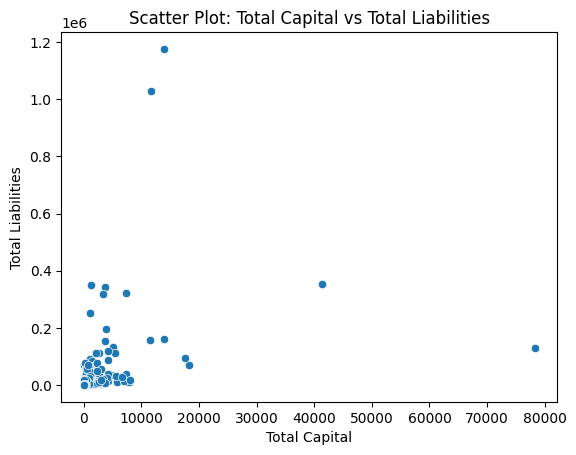

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot using Seaborn
sns.scatterplot(data=df, x='Total capital', y='Total liabilities')
plt.title('Scatter Plot: Total Capital vs Total Liabilities')
plt.xlabel('Total Capital')
plt.ylabel('Total Liabilities')
plt.show()


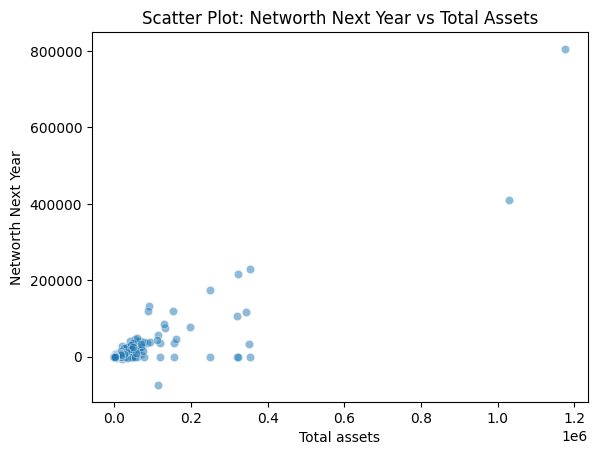

In [ ]:
sns.scatterplot(x='Total assets', y='Networth Next Year', data=df, alpha=0.5)
plt.title('Scatter Plot: Networth Next Year vs Total Assets')
plt.show()

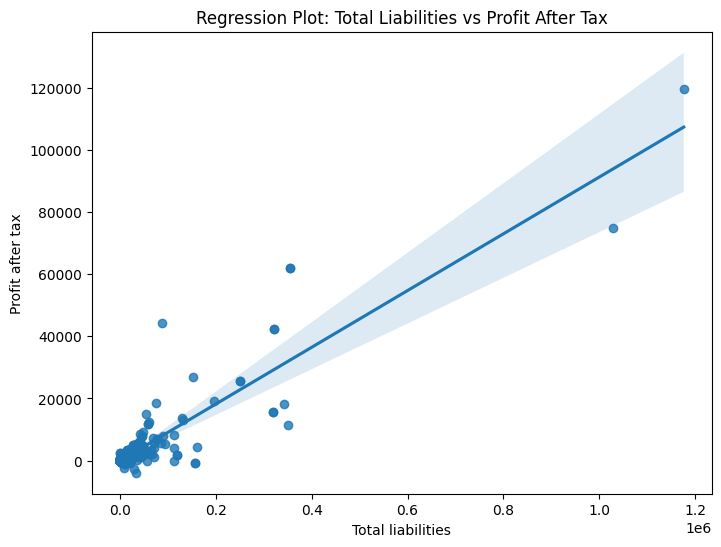

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Total liabilities', y='Profit after tax', data=df)
plt.title('Regression Plot: Total Liabilities vs Profit After Tax')
plt.show()

# 3. IDENTIFYING IMPORTANT COLUMNS USING STATISTICAL TESTS

In [ ]:
correlation_with_target = df.corr()['Networth Next Year'].drop('Networth Next Year')

# Identify columns with no correlation
columns_to_drop = correlation_with_target[correlation_with_target.abs() < 0.01].index

# Drop the columns with no correlation
df = df.drop(columns=columns_to_drop)

# Print the dropped and undropped columns
print("Dropped Columns:")
print(columns_to_drop.values)


Dropped Columns:
['PBDITA as % of total income' 'PBT as % of total income'
 'PAT as % of total income' 'Cash profit as % of total income'
 'Total term liabilities / tangible net worth'
 'Contingent liabilities / Net worth (%)' 'Quick ratio (times)'
 'Current ratio (times)' 'Cash to current liabilities (times)'
 'Creditors turnover' 'Debtors turnover' 'Finished goods turnover'
 'WIP turnover' 'Raw material turnover' 'Equity face value' 'EPS'
 'Adjusted EPS']


In [ ]:
print("\nUndropped Columns:")
print(df.columns.values)


Undropped Columns:
['Networth Next Year' 'Total assets' 'Net worth' 'Total income'
 'Change in stock' 'Total expenses' 'Profit after tax' 'PBDITA' 'PBT'
 'Cash profit' 'PAT as % of net worth' 'Sales' 'Total capital'
 'Reserves and funds' 'Borrowings' 'Current liabilities & provisions'
 'Shareholders funds' 'Cumulative retained profits' 'Capital employed'
 'TOL/TNW' 'Net fixed assets' 'Current assets' 'Net working capital'
 'Debt to equity ratio (times)' 'Cash to average cost of sales per day'
 'Shares outstanding' 'Total liabilities']


Now we will only consider the important columns, and build our models based on the selected important columns

In [ ]:
networth = df['Networth Next Year']

Creating a correlation matrix on the selected columns

In [ ]:
df.corr()

,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,Cash profit,...,Cumulative retained profits,Capital employed,TOL/TNW,Net fixed assets,Current assets,Net working capital,Debt to equity ratio (times),Cash to average cost of sales per day,Shares outstanding,Total liabilities
Networth Next Year,1.000000,0.877803,0.930135,0.711018,0.344796,0.690589,0.868001,0.872407,0.833816,0.906612,...,0.897532,0.901214,-0.010461,0.929521,0.654638,-0.065841,-0.011834,-0.058689,0.383838,0.877803
Total assets,0.877803,1.000000,0.959404,0.868319,0.467549,0.852870,0.907546,0.943386,0.895110,0.939888,...,0.961623,0.978867,-0.008082,0.939431,0.889128,0.026968,-0.008463,0.041547,0.472068,1.000000
Net worth,0.930135,0.959404,1.000000,0.783857,0.393800,0.761596,0.954373,0.962911,0.932446,0.978414,...,0.976804,0.980948,-0.013888,0.966319,0.773008,0.056037,-0.013857,0.023043,0.491652,0.959404
Total income,0.711018,0.868319,0.783857,1.000000,0.277177,0.999202,0.727552,0.793299,0.727306,0.762735,...,0.855420,0.827226,-0.006442,0.779938,0.804263,-0.058651,-0.007690,-0.002684,0.358294,0.868319
Change in stock,0.344796,0.467549,0.393800,0.277177,1.000000,0.274467,0.367689,0.390249,0.369772,0.392502,...,0.358937,0.406027,-0.001394,0.402844,0.540958,-0.068856,-0.007252,-0.002003,0.335828,0.467549
Total expenses,0.690589,0.852870,0.761596,0.999202,0.274467,1.000000,0.700076,0.769251,0.700128,0.737471,...,0.836087,0.809367,-0.005939,0.761617,0.794004,-0.072920,-0.007185,-0.002624,0.341174,0.852870
Profit after tax,0.868001,0.907546,0.954373,0.727552,0.367689,0.700076,1.000000,0.990416,0.995143,0.990292,...,0.949653,0.911319,-0.013048,0.887587,0.787935,0.187674,-0.014780,-0.004016,0.573078,0.907546
PBDITA,0.872407,0.943386,0.962911,0.793299,0.390249,0.769251,0.990416,1.000000,0.988876,0.991635,...,0.968337,0.938460,-0.010761,0.910161,0.836219,0.177805,-0.011873,0.011257,0.566522,0.943386
PBT,0.833816,0.895110,0.932446,0.727306,0.369772,0.700128,0.995143,0.988876,1.000000,0.977961,...,0.937524,0.891564,-0.013050,0.855028,0.808103,0.243354,-0.014671,-0.003923,0.598763,0.895110
Cash profit,0.906612,0.939888,0.978414,0.762735,0.392502,0.737471,0.990292,0.991635,0.977961,1.000000,...,0.967485,0.944788,-0.011903,0.938934,0.792558,0.114012,-0.013088,-0.004236,0.537390,0.939888


# 4. OUTLIER DETECTION AND TREATMENT USING IQR METHOD

In [ ]:
import pandas as pd
import numpy as np

# Function to detect and scale down outliers using IQR method
def detect_and_scale_outliers(df, column_name, scaling_factor=1.5):
    # Calculate the IQR (Interquartile Range)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - scaling_factor * IQR
    upper_bound = Q3 + scaling_factor * IQR

    # Identify and scale down outliers
    df[column_name] = np.where(df[column_name] < lower_bound, lower_bound, df[column_name])
    df[column_name] = np.where(df[column_name] > upper_bound, upper_bound, df[column_name])

    return df

# Columns to perform outlier scaling on
columns_to_check = df.columns

# Loop through each column for outlier scaling
for column_name in columns_to_check:
    df = detect_and_scale_outliers(df, column_name, scaling_factor=1.5)

# Print a message to indicate that outlier scaling has been applied to the DataFrame
print("Outliers have been scaled down in the DataFrame.")


Outliers have been scaled down in the DataFrame.


# 6. TRAIN TEST SPLIT

In [ ]:
df['Default'] = df['Networth Next Year'].apply(lambda x: 1 if x < 0 else 0)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Default'], axis=1), df['Default'], test_size=0.25, random_state=42)


In [ ]:
df.isnull().sum()

Networth Next Year                       0
Total assets                             0
Net worth                                0
Total income                             0
Change in stock                          0
Total expenses                           0
Profit after tax                         0
PBDITA                                   0
PBT                                      0
Cash profit                              0
PAT as % of net worth                    0
Sales                                    0
Total capital                            0
Reserves and funds                       0
Borrowings                               0
Current liabilities & provisions         0
Shareholders funds                       0
Cumulative retained profits              0
Capital employed                         0
TOL/TNW                                  0
Net fixed assets                         0
Current assets                           0
Net working capital                      0
Debt to equ

# 7. BUILDING LOGISTIC REGRESSION MODEL USING STATSMODEL LIBRARY

In [ ]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

# Add a constant term to the features for the intercept
X_train = add_constant(X_train)

# Build the logistic regression model with L2 regularization (Ridge)
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit_regularized(method='l1', alpha=0.1, maxiter=10000, qc_verbose=True)  # Adjust alpha as needed

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning:

divide by zero encountered in log



Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0013560549936643277
            Iterations: 1655
            Function evaluations: 4703
            Gradient evaluations: 1655


/usr/local/lib/python3.10/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning:

QC check did not pass for 4 out of 28 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
------ Recall the problem was rescaled by 1 / nobs ---
|passed    |alpha     |fprime    |param     |
--------------------------------------------
|True      |3.133e-05 |3.132e-05 |-1.651e+00|
|True      |3.133e-05 |3.132e-05 |-2.877e+01|
|True      |3.133e-05 |-2.787e-05|6.448e-02 |
|True      |3.133e-05 |3.208e-05 |-3.545e-01|
|True      |3.133e-05 |-2.997e-05|1.381e-01 |
|True      |3.133e-05 |3.155e-05 |-1.979e-01|
|False     |3.133e-05 |3.270e-05 |-4.980e-02|
|True      |3.133e-05 |-2.388e-05|-8.392e-15|
|True      |3.133e-05 |9.449e-06 |-2.638e-15|
|True      |3.133e-05 |-2.024e-05|-9.085e-15|
|True      |3.133e-05 |-3.124e-05|1.398e-01 |
|True      |3.133e-05 |3.148e-05 |-9.436e-02|
|False     |3.133e-05 |3.275e-05 |-1.706e-01|
|True      |

In [ ]:
# Print the summary of the model
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning:

overflow encountered in exp



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 3192
Model:                          Logit   Df Residuals:                     3164
Method:                           MLE   Df Model:                           27
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.9984
Time:                        21:37:15   Log-Likelihood:                -1.0739
converged:                       True   LL-Null:                       -672.54
Covariance Type:            nonrobust   LLR p-value:                3.156e-266
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6510      3.405     -0.485      0.628      -8.325       5.023
Networth Next Year                      -28.7708     10.375     -2.773      0.006     -49.106      -8.436
Total assets                              0.0645   1.56e+12   4.14e-14      1.000   -3.05e+12    3.05e+12
Net worth                                -0.3545      1.168     -0.303      0.762      -2.645       1.936
Total income                              0.1381        nan        nan        nan         nan         nan
Change in stock                          -0.1979      0.870     -0.227      0.820      -1.903       1.507
Total expenses                           -0.0498        nan        nan        nan         nan         nan
Profit after tax                      -8.392e-15      3.849  -2.18e-15      1.000      -7.543       7.543
PBDITA                                -2.638e-15      2.950  -8.94e-16      1.000      -5.783       5.783
PBT                                   -9.085e-15      1.969  -4.61e-15      1.000      -3.859       3.859
Cash profit                               0.1398      1.610      0.087      0.931      -3.015       3.294
PAT as % of net worth                    -0.0944      0.120     -0.783      0.433      -0.330       0.142
Sales                                    -0.1706      0.679     -0.251      0.802      -1.502       1.160
Total capital                            -0.3485      0.656     -0.531      0.595      -1.634       0.937
Reserves and funds                       -0.1839      0.936     -0.197      0.844      -2.018       1.650
Borrowings                             8.643e-06      0.710   1.22e-05      1.000      -1.392       1.392
Current liabilities & provisions       5.549e-17      0.471   1.18e-16      1.000      -0.924       0.924
Shareholders funds                       -0.0054      1.367     -0.004      0.997      -2.685       2.674
Cumulative retained profits            1.332e-15      1.016   1.31e-15      1.000      -1.991       1.991
Capital employed                          0.0108      0.491      0.022      0.982      -0.952       0.974
TOL/TNW                               -2.296e-15      1.934  -1.19e-15      1.000      -3.791       3.791
Net fixed assets                         -0.0280      0.308     -0.091      0.928      -0.632       0.576
Current assets                            0.0443      0.816      0.054      0.957      -1.555       1.644
Net working capital                      -0.0025      0.388     -0.006      0.995      -0.764       0.759
Debt to equity ratio (times)             -0.2681      2.610     -0.103      0.918      -5.383       4.847
Cash to average cost of sales per day    -0.0230      0.064     -0.358      0.720      -0.149       0.103
Shares outstanding                     1.172e-06   2.57e-06      0.457      0.648   -3.85e-06     6.2e-06
Total liabilities                         0.0006   1.56e+12  

# 8. LOGISTIC REGRESSION MODEL EVALUATION

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Add a constant term to the test features for the intercept
X_test = add_constant(X_test)

# Predict the probabilities of default
y_pred_prob = result.predict(X_test)

# Define a threshold for classification
cutoff = 0.5

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > cutoff).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1000    3]
 [   3   58]]


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning:

overflow encountered in exp



In [ ]:
# Calculate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1003
           1       0.95      0.95      0.95        61

    accuracy                           0.99      1064
   macro avg       0.97      0.97      0.97      1064
weighted avg       0.99      0.99      0.99      1064



# 9. BUILDING RANDOM FORESTS MODEL USING SKLEARN

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)




# 10. RANDOM FOREST MODEL EVALUATION

In [ ]:
# Calculate the confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)



Confusion Matrix (Random Forest):
[[1003    0]
 [   0   61]]


In [ ]:
# Calculate classification report for Random Forest
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest):")
print(report_rf)

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1003
           1       1.00      1.00      1.00        61

    accuracy                           1.00      1064
   macro avg       1.00      1.00      1.00      1064
weighted avg       1.00      1.00      1.00      1064

